In [1]:
# utilities
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df=pd.read_csv("Influencer.csv")
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [3]:
# Cleansing Posts column
post=list(df['Posts'])
post1=list()
for num in post:
    if 'k' in num:
        new_num=1000*float(num.replace('k',''))
        post1.append(new_num)
    else:
        post1.append(float(num))
df['Posts']=post1

In [4]:
# Cleansing Followers column
followers=list(df['Followers'])
followers1=list()
for num in followers:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        followers1.append(new_num)
    else:
        followers1.append(float(num))
df['Followers']=followers1

In [5]:
# Cleansing Avg. Likes column
avg_likes=list(df['Avg. Likes'])
avg_likes1=list()
for num in avg_likes:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        avg_likes1.append(new_num)
    else:
        new_num=1000*float(num.replace('k',''))
        avg_likes1.append(new_num)
df['Avg. Likes']=avg_likes1

In [6]:
# Cleansing Total Likes column
total_likes=list(df['Total Likes']) 
total_likes1=list()
for num in total_likes:
    if 'b' in num:
        new_num=1000000000*float(num.replace('b',''))
        total_likes1.append(new_num)
    else:
        new_num=1000000*float(num.replace('m',''))
        total_likes1.append(new_num)
df['Total Likes']=total_likes1

In [7]:
# Cleansing New Post Avg. Likes column
new_post_avg_like=list(df['New Post Avg. Likes'])  
new_post_avg_like1=list()
for num in new_post_avg_like:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        new_post_avg_like1.append(new_num)    
    else:
        new_num=1000*float(num.replace('k',''))
        new_post_avg_like1.append(new_num)
df['New Post Avg. Likes']=new_post_avg_like1

In [8]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,NaN
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States


In [9]:
# Identifying the correlation bwteen variables
df.corr()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
Rank,1.000000,-0.354843,-0.698193,-0.277699,-0.058132,0.028900,-0.272323,-0.465119
Influence Score,-0.354843,1.000000,0.365428,0.048502,0.168287,-0.072460,0.040011,0.234987
Followers,-0.698193,0.365428,1.000000,0.346829,0.069171,-0.107439,0.260764,0.667546
Avg. Likes,-0.277699,0.048502,0.346829,1.000000,-0.348795,0.789359,0.892784,0.361296
Posts,-0.058132,0.168287,0.069171,-0.348795,1.000000,-0.334047,-0.285154,0.232038
60-Day Eng Rate,0.028900,-0.072460,-0.107439,0.789359,-0.334047,1.000000,0.866293,-0.001560
New Post Avg. Likes,-0.272323,0.040011,0.260764,0.892784,-0.285154,0.866293,1.000000,0.351335
Total Likes,-0.465119,0.234987,0.667546,0.361296,0.232038,-0.001560,0.351335,1.000000


<AxesSubplot: >

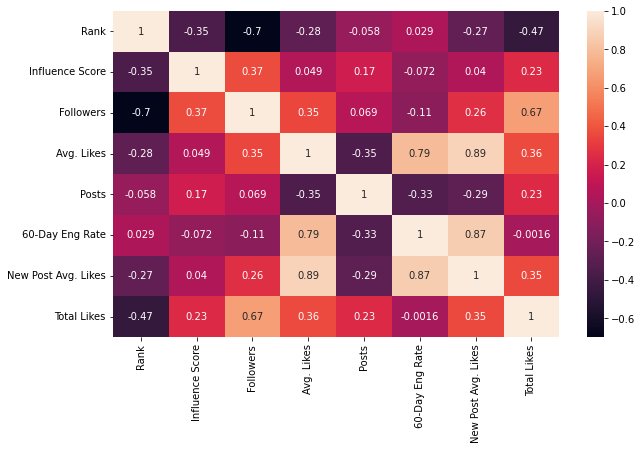

In [10]:
# Display it in a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), ax=ax, annot=True)

In [ ]:
# Rank, Followers, Influence Scores, Total Likes are correlated.
# Ave likes, 60-Day Eng Rate and New Post Avg. Likes are correlated.

(array([  1.,   0.,   3.,   1.,   1.,   2.,   3.,  25., 107.,  57.]),
 array([22. , 29.1, 36.2, 43.3, 50.4, 57.5, 64.6, 71.7, 78.8, 85.9, 93. ]),
 <BarContainer object of 10 artists>)

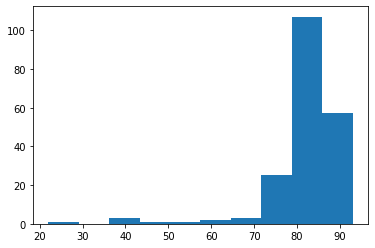

In [11]:
# Frequency Distibution of Influence Score
plt.hist(df['Influence Score'])
# The variable is left shewed

(array([161.,  10.,   8.,   5.,   6.,   3.,   4.,   2.,   0.,   1.]),
 array([3.3400e+07, 7.8580e+07, 1.2376e+08, 1.6894e+08, 2.1412e+08,
        2.5930e+08, 3.0448e+08, 3.4966e+08, 3.9484e+08, 4.4002e+08,
        4.8520e+08]),
 <BarContainer object of 10 artists>)

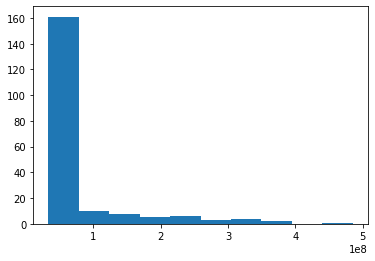

In [12]:
# Frequency districbution of Followers
plt.hist(df['Followers'])
# The variable is right skewed

(array([84., 44., 22., 13., 11., 22.,  2.,  1.,  0.,  1.]),
 array([   20.,  1708.,  3396.,  5084.,  6772.,  8460., 10148., 11836.,
        13524., 15212., 16900.]),
 <BarContainer object of 10 artists>)

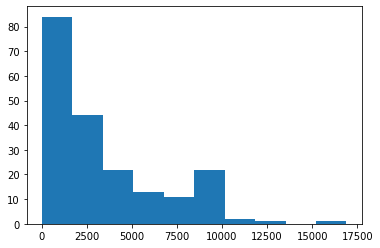

In [13]:
# Frequency Districution of 
plt.hist(df['Posts'])
# the variable is little bet right skewed

<AxesSubplot: >

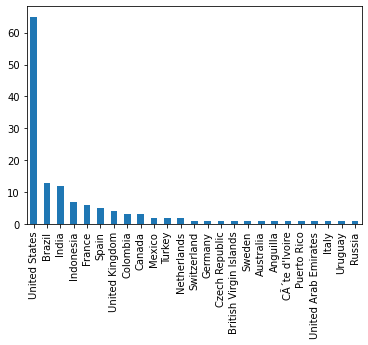

In [14]:
# Country with most number of influencers
df['Country Or Region'].value_counts().plot(kind='bar')

In [15]:
# Top 10 Influnecers based on Follwers, Avg likes & Total Likes
df.nlargest(10, ['Followers', 'Avg. Likes', 'Total Likes'])

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,NaN
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
5,6,\narianagrande,92,333000000.0,3700000.0,5000.0,0.009,3100000.0,1.850000e+10,United States
6,7,\nkimkardashian,91,330700000.0,3500000.0,5700.0,0.005,1700000.0,1.980000e+10,United States
7,8,\nbeyonce,92,276100000.0,3600000.0,2000.0,0.008,2200000.0,7.300000e+09,United States
8,9,\nkhloekardashian,89,273900000.0,2400000.0,4100.0,0.002,404700.0,9.800000e+09,United States
9,10,\njustinbieber,91,260000000.0,1900000.0,7400.0,0.007,1700000.0,1.400000e+10,Canada


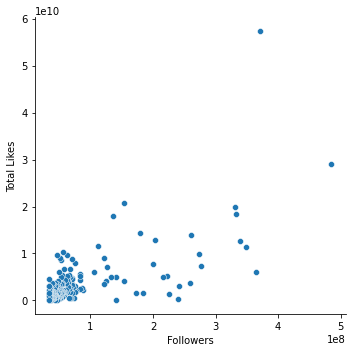

In [16]:
# Relation between Follower & Total Likes
sns.relplot(x ="Followers", y ="Total Likes",
            data = df);

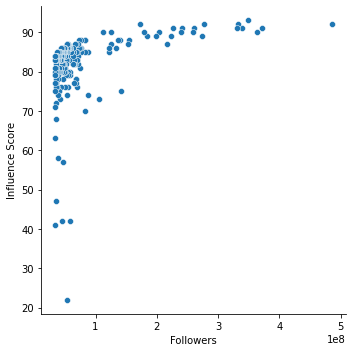

In [17]:
# Relation between Follower & Influence Scores
sns.relplot(x ="Followers", y ="Influence Score",
            data = df);

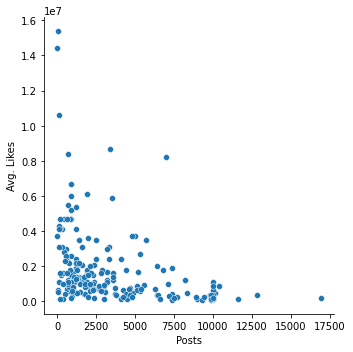

In [18]:
# Relation between Post & Avg Likes
sns.relplot(x ="Posts", y ="Avg. Likes",
            data = df);

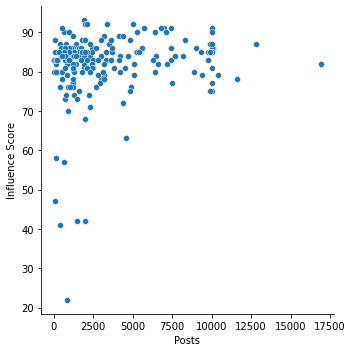

In [19]:
# Relation between Post & Influence Scores
sns.relplot(x ="Posts", y ="Influence Score",
            data = df);